# Project 4.Wrangle and Analyze Data

## Table of Contents
- [I.Introduction](#intro)
- [II.Gathering Data](#gather)
- [III.Assessing Data](#assess)
- [IV.Cleaning Data](#clean)
- [V.Analyzing Data & Visualization](#analyze)

<a id='intro'></a>
## I. Introduction

This project's target is to practice the skills of wrangling and analyzing data using real-world data. 
The dataset for this project is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). 

Steps for this project include: 
- Gather data in different format from different sources. 
- Assess the data both visually and programmatically to identify quality issues and tidiness issues.
- Cleaning programmatical to fix all the issues. 
- Analyze the cleaned dataset and visualize the results.  

<a id='gather'></a>
## II. Gathering Data

Gather each of the three pieces of data from different sources:
- WeRateDogs Twitter archive-`twitter_archive_enhanced.csv`: provided by the project
- Tweet image predictions-`image_predictions.tsv`: provided by the project 
- Twitter data for retweet count and favorite count-`tweet_json.txt`: provided by the project 

To get started, let's import our libraries. 

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

### WeRateDogs Twitter Archive Dataset

In [222]:
df_twitter_archive_enhanced = pd.read_csv("DataSource/twitter-archive-enhanced.csv", sep=",")

In [223]:
df_twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Image Predictions Dataset

In [224]:
df_image_predictions = pd.read_csv("DataSource/image-predictions.tsv", sep="\t")

In [225]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Twitter API Dataset

In [226]:
data = []
df_header = ['tweet_id', 'retweet_count', 'favorite_count']

file = open("DataSource/tweet-json.txt", 'r')
file_content = file.readlines()
file_content
for line in file_content:
    row = json.loads(line)
    data.append({'tweet_id': row['id'],
        'retweet_count': row['retweet_count'],
        'favorite_count': row['favorite_count']})
file.close()



In [227]:
df_tweet_json = pd.DataFrame(data, columns = df_header)
df_tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assess'></a>
## III. Assessing Data

In the section, I gonna assess the data both visually and programmatically to identify wether datasets contains any data quality issues and tidiness issues. 

Data quality dimensions:
- Completeness
- Validity
- Accuracy
- Consistency

Tidy data requirements:
- Each variable forms a column
- Each observation forms a row
- Each type of observational unit forms a table

### df_twitter_archive_enhanced

In [228]:
df_twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [229]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [230]:
df_twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [231]:
df_twitter_archive_enhanced.duplicated().sum()

0

In [232]:
df_twitter_archive_enhanced["tweet_id"].duplicated().sum()

0

In [233]:
df_twitter_archive_enhanced["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [234]:
df_twitter_archive_enhanced["rating_denominator"].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

<b>Observations</b>:
- We only need the original rating with pictures. 
- Wrong data type of [timestamp] column, it should be "datetime" not "str"
- All the dog type (doggo, floofer, pupper, puppo) should be in a single column. 
- rating_denominator has value as 170, 150, 130,  ... are illegal. The rating_denominator is almost always 10
- rating_numerator has value as 1776, 960, 666, 204, 165, ... are abnormal. 
- [Source] are confused, not make any meaning.  

### df_image_predictions

In [235]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [236]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [237]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [238]:
df_image_predictions.duplicated().sum()

0

In [239]:
df_image_predictions["jpg_url"].duplicated().sum()

66

In [240]:
df_image_predictions["p1"].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [241]:
df_image_predictions["p2"].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [242]:
df_image_predictions["p3"].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

<b>Observations</b>:
- [jpg_url] column is duplicated
- The predict value in p1, p2, p3 has many value in not dog 
- Character of p1, p2, p3 value is not in the same format, make it hard to read
- We only need the most confident prediction for dog bread, [p1] cloumn.

### df_tweet_json

In [243]:
df_tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [244]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [245]:
df_tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [246]:
df_tweet_json.duplicated().sum()

0

<b>Observations</b>: I dont have any problem with this datasets 

#### Summary:

##### Quality
`df_twitter_archive_enhanced` 
- We only need the original rating with pictures, we dont need retweet and reply.
- Wrong data type of [timestamp] column, it should be "datetime" not "str"
- rating_denominator has value as 170, 150, 130,  ... are illegal. The rating_denominator is almost always 10
- rating_numerator has value as 1776, 960, 666, 204, 165, ... are abnormal. 
- [Source] are confused, not make any meaning.  

`df_image_predictions`
- [jpg_url] column is duplicated
- The predict value in p1, p2, p3 has many value in not dog 
- Character of p1, p2, p3 value is not in the same format, make it hard to read
- We only need the most confident prediction for dog bread.

`df_tweet_json`
- Dont have any data problem with this

##### Tidiness
- All the dog type (doggo, floofer, pupper, puppo) in `df_twitter_archive_enhanced` data should be in a single column. 
- All three table should be join into one because they are all relative to each other. 

<a id='clean'></a>
## IV.Cleaning Data

In the session, I will perform data cleansing on each datasets base on what I have observe above. 

First I gonna make another copy for each datasets and perform cleansing on these instead of the raw one. 



In [247]:
df_twt_arc_stg = df_twitter_archive_enhanced.copy()
df_img_prd_stg = df_image_predictions.copy()
df_twt_js_stg = df_tweet_json.copy()

### df_twitter_archive_enhanced

In [248]:
df_twt_arc_stg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- First we need to remove all retweet and reply

In [249]:
retweet_filter = df_twt_arc_stg["retweeted_status_id"].isnull()
df_twt_arc_stg = df_twt_arc_stg[retweet_filter]

reply_filter = df_twt_arc_stg["in_reply_to_status_id"].isnull()
df_twt_arc_stg = df_twt_arc_stg[reply_filter]

- Next, we convert timestamp from "str" type to "datetime" type

In [250]:
df_twt_arc_stg["timestamp"] = df_twt_arc_stg["timestamp"].str.strip("+0000")
df_twt_arc_stg["timestamp"] = pd.to_datetime(df_twt_arc_stg["timestamp"])

- Next, we will only select rows have "rating_denominator" value equal to 10

In [251]:
df_twt_arc_stg = df_twt_arc_stg[df_twt_arc_stg["rating_denominator"] == 10]


- And we will cleansing the "rating_numerator" data also. But first, we will have a look at the data after we have drop all the rows that has "rating_denominator" are not equal to 10 

In [252]:
df_twt_arc_stg["rating_numerator"].value_counts()

12      486
10      436
11      413
13      287
9       152
8        98
7        51
14       38
5        34
6        32
3        19
4        15
2         9
1         4
27        1
75        1
0         1
1776      1
26        1
420       1
Name: rating_numerator, dtype: int64

- I will drop all the value have value_count is equal to 1, since it is not making any sense and it would not effect much on the data too. 

In [253]:
count = df_twt_arc_stg["rating_numerator"].value_counts()
df_twt_arc_stg = df_twt_arc_stg[~df_twt_arc_stg['rating_numerator'].isin(count[count == 1].index)]

In [254]:
df_twt_arc_stg["rating_numerator"].value_counts()

12    486
10    436
11    413
13    287
9     152
8      98
7      51
14     38
5      34
6      32
3      19
4      15
2       9
1       4
Name: rating_numerator, dtype: int64

- Next, we merge all dog type column into one single columns. Include 3 steps:
    - First, create a boolen list for each columns dog_breed 
    - Second, we create a list called "dog_breed" so for each row we go through, we will expand the value of the type to the list: "Doggo", "Floofer", "Pupper", "Puppo" and "Other" if all 4 column is "None"
    - Finnaly, we create a new column in the df and add data of the list into it.

In [255]:
doggo_filter = df_twt_arc_stg["doggo"] != "None"
doggo_filter = doggo_filter.to_list()
# len(doggo_filter)

floofer_filter = df_twt_arc_stg["floofer"] != "None"
floofer_filter = floofer_filter.to_list()
# len(floofer_filter)

pupper_filter = df_twt_arc_stg["pupper"] != "None"
pupper_filter = pupper_filter.to_list()
# len(pupper_filter)

puppo_filter = df_twt_arc_stg["puppo"] != "None"
puppo_filter = puppo_filter.to_list()
# len(puppo_filter)

dog_breed = []
for i in range(len(doggo_filter)):
    if doggo_filter[i]:
        dog_breed.append("Doggo")
    elif floofer_filter[i]:
        dog_breed.append("Floofer")
    elif pupper_filter[i]:
        dog_breed.append("Pupper")
    elif puppo_filter[i]:
        dog_breed.append("Puppo")
    else:
        dog_breed.append("Other")

# dog_breed

In [256]:
df_twt_arc_stg["dog_breed"] = dog_breed

- Finally, we drop all un-use columns:
    + source
    + expanded_urls
    + in_reply_to_status_id     
    + in_reply_to_user_id   
    + retweeted_status_id       
    + retweeted_status_user_id  
    + retweeted_status_timestamp
    + name        
    + doggo        
    + floofer        
    + pupper        
    + puppo      

In [257]:
df_twt_arc_stg = df_twt_arc_stg.drop(  
    ["source",
    "expanded_urls",
    "in_reply_to_status_id",
    "in_reply_to_user_id",
    "retweeted_status_id",
    "retweeted_status_user_id",
    "retweeted_status_timestamp",
    "name",
    "doggo",
    "floofer",
    "pupper",
    "puppo"],axis=1)

In [258]:
df_twt_arc_stg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2074 non-null   int64         
 1   timestamp           2074 non-null   datetime64[ns]
 2   text                2074 non-null   object        
 3   rating_numerator    2074 non-null   int64         
 4   rating_denominator  2074 non-null   int64         
 5   dog_breed           2074 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 113.4+ KB


### df_image_predictions

In [259]:
df_img_prd_stg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- First, we will check some null, none value in this datasets

- We merge all p1, p2, p3 into a column with most confident prediction and remove if it is not "dog". We also make the value of dog_greed easier to read. 

In [260]:
df = df_img_prd_stg
dog_breed_pre = []
pre_conf = []
# df["probability"] 

for i in range(df.shape[0]):
    if df["p1_dog"][i] == True:
        breed = df["p1"][i].capitalize()
        dog_breed_pre.append(breed)
        pre_conf.append(df["p1_conf"][i])
    elif df["p2_dog"][i] == True:
        breed = df["p2"][i].capitalize()
        dog_breed_pre.append(breed)
        pre_conf.append(df["p2_conf"][i])
    elif df["p3_dog"][i] == True:
        breed = df["p3"][i].capitalize()
        dog_breed_pre.append(breed)
        pre_conf.append(df["p3_conf"][i])
    else:
        dog_breed_pre.append("None")
        pre_conf.append(0)

In [261]:
new_dog_breed = []
for name in dog_breed_pre:
    split = name.split("_")
    new_name = ""
    for i in split:
        new_name = new_name + " " + i
        new_name = new_name.strip(" ")
    new_dog_breed.append(new_name)
# new_dog_breed


In [262]:
len(new_dog_breed)

2075

In [263]:
df_img_prd_stg["pre_dog_breed"] = new_dog_breed
df_img_prd_stg["pre_conf"] = pre_conf

- And we will drop all "p" columns after we create a new column. 

In [264]:
df_img_prd_stg.drop(
    columns=["p1", "p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"],
    axis=1,
    inplace=True
)

In [265]:
df_img_prd_stg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       2075 non-null   int64  
 1   jpg_url        2075 non-null   object 
 2   img_num        2075 non-null   int64  
 3   pre_dog_breed  2075 non-null   object 
 4   pre_conf       2075 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB


In [266]:
df_img_prd_stg[df_img_prd_stg["pre_dog_breed"] == "None"].head()

,tweet_id,jpg_url,img_num,pre_dog_breed,pre_conf
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,None,0.0
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,None,0.0
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,None,0.0
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,None,0.0
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,None,0.0


We notice that ther are many tweet that have prediction value as None true value for dog, when merge all the "p" column, I marked them with "None" as dog_breed and zero as  pre_conf or "prediction confidence". So it is the best that we remove all these rows on image_prediction datasets and also on others datasets. 

In [267]:
print("Shape of datasets before remove: ")
print("twitter_archive: ", df_twt_arc_stg.shape)
print("image_prediction: ", df_img_prd_stg.shape)
print("tweet_json: ", df_twt_js_stg.shape)

Shape of datasets before remove: 
twitter_archive:  (2074, 6)
image_prediction:  (2075, 5)
tweet_json:  (2354, 3)


In [268]:
list_to_remove = df_img_prd_stg[df_img_prd_stg["pre_dog_breed"] == "None"]
id_to_remove = list_to_remove["tweet_id"]

df_twt_arc_stg = df_twt_arc_stg[~df_twt_arc_stg["tweet_id"].isin(id_to_remove)]
df_img_prd_stg = df_img_prd_stg[~df_img_prd_stg["tweet_id"].isin(id_to_remove)]
df_twt_js_stg = df_twt_js_stg[~df_twt_js_stg["tweet_id"].isin(id_to_remove)]

In [269]:
print(df_twt_arc_stg.shape)
print(df_img_prd_stg.shape)
print(df_twt_js_stg.shape)

(1772, 6)
(1751, 5)
(2031, 3)


In [270]:
df_twt_js_stg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2031 entries, 1 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2031 non-null   int64
 1   retweet_count   2031 non-null   int64
 2   favorite_count  2031 non-null   int64
dtypes: int64(3)
memory usage: 63.5 KB


- And finally, we will join the datasets so we can have a more insight detail about all 3 datasets. Since all the datasets have column "tweet_id" and this is also unique, we will use this column as a key for joining. 

- First we gonna join twitter-archive-enhanced datasets with image_prediction, so we have all the prediction of the tweet with rating. And this in the left join, so after the join, we have to check if there are any row that are not being joined and remove these rows.

In [271]:
df_twt_arc_with_img_prd = pd.merge(df_twt_arc_stg, df_img_prd_stg,
                            on = ["tweet_id"], how = "left")

df_twt_arc_with_img_prd["jpg_url"].isnull().sum()

126

In [272]:
df_twt_arc_with_img_prd = df_twt_arc_with_img_prd[df_twt_arc_with_img_prd["jpg_url"].notnull()]

In [273]:
df_twt_arc_with_img_prd["jpg_url"].isnull().sum()

0

In [274]:
df_twt_arc_with_img_prd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646 entries, 0 to 1771
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1646 non-null   int64         
 1   timestamp           1646 non-null   datetime64[ns]
 2   text                1646 non-null   object        
 3   rating_numerator    1646 non-null   int64         
 4   rating_denominator  1646 non-null   int64         
 5   dog_breed           1646 non-null   object        
 6   jpg_url             1646 non-null   object        
 7   img_num             1646 non-null   float64       
 8   pre_dog_breed       1646 non-null   object        
 9   pre_conf            1646 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 141.5+ KB


- And then, we join the datasets above with tweet-json to have all the retweet_count and favorite_count from it.

In [275]:
df_final = pd.merge(df_twt_arc_with_img_prd, df_twt_js_stg,
                    on = ["tweet_id"], how = "left")

In [276]:
df_final.head()


,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_breed,jpg_url,img_num,pre_dog_breed,pre_conf,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Other,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Other,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,4328,25461
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Other,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador retriever,0.168086,8964,42908
3,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Other,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,9774,41048
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,Other,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake bay retriever,0.425595,3261,20562


In [277]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646 entries, 0 to 1645
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1646 non-null   int64         
 1   timestamp           1646 non-null   datetime64[ns]
 2   text                1646 non-null   object        
 3   rating_numerator    1646 non-null   int64         
 4   rating_denominator  1646 non-null   int64         
 5   dog_breed           1646 non-null   object        
 6   jpg_url             1646 non-null   object        
 7   img_num             1646 non-null   float64       
 8   pre_dog_breed       1646 non-null   object        
 9   pre_conf            1646 non-null   float64       
 10  retweet_count       1646 non-null   int64         
 11  favorite_count      1646 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 167.2+ KB


- This is the datasets that we can use for Analyze and visualize. So we safe this data as csv file for easy access

In [278]:
# df_final.to_csv("DataSource/twitter_final_table.csv")

df = pd.read_csv("DataSource/twitter_final_table.csv")

<a id='analyze'></a>
## V.Analyzing Data & Visualization

- At this session, we will analyze and visualize on the datasets we have process above. The analyze questions include:
    - Which is the most common dog breed on the datasets
    - Which top 10 dog breed is the most popular base on number of tweet
    - Which top 10 dog breed is  the most popular base on number of retweets and number of total favorite
    - Which top 10 dog breed is  the most popular base on number of total favorite
    - Histogram of rating_numerator
- For each question, we will collect columns we need only and visualize base on that. 


#### Which is the most common dog breed on the datasets

In [279]:
df_target = df[["tweet_id", "dog_breed"]]
df_target.head()

,tweet_id,dog_breed
0,892177421306343426,Other
1,891815181378084864,Other
2,891689557279858688,Other
3,891327558926688256,Other
4,891087950875897856,Other


In [280]:
df_target["dog_breed"].value_counts(normalize=True)

Other      0.844471
Pupper     0.100243
Doggo      0.038275
Puppo      0.012758
Floofer    0.004253
Name: dog_breed, dtype: float64

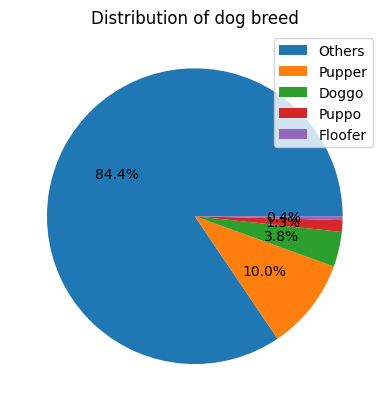

In [281]:
# Plot pie chart
labels = ["Others", "Pupper", "Doggo", "Puppo", "Floofer"]
values = df_target["dog_breed"].value_counts(normalize=True)
# explode = (0.2, 0, 0, 0, 0)

plt.pie(
    values,
    autopct="%1.1f%%", 
    radius = 1)
plt.legend(labels, loc=0)
plt.title("Distribution of dog breed");

As we can see from the chart, most of the tweet have "Others" dog breed, in the other word, those tweet do not provide the dog breed in the data, so when cleansing, I mark those with others. For those have information, Pupper is the most common breed dog, following by Doggo, Puppo and Floofer

In [282]:
plt.savefig("GraphReport/Distribution of dog breed.png")

<Figure size 640x480 with 0 Axes>

#### Which top 10 dog breed prediction is the most popular base on number of tweet

In [283]:
df_target = df[["tweet_id", "pre_dog_breed"]]
df_target.head()

,tweet_id,pre_dog_breed
0,892177421306343426,Chihuahua
1,891815181378084864,Chihuahua
2,891689557279858688,Labrador retriever
3,891327558926688256,Basset
4,891087950875897856,Chesapeake bay retriever


In [284]:
df_target["pre_dog_breed"].value_counts()
df_target = df_target["pre_dog_breed"].value_counts().head(10)
df_target

Golden retriever      153
Labrador retriever    103
Pembroke               94
Chihuahua              89
Pug                    62
Toy poodle             50
Chow                   47
Samoyed                42
Pomeranian             40
Malamute               33
Name: pre_dog_breed, dtype: int64

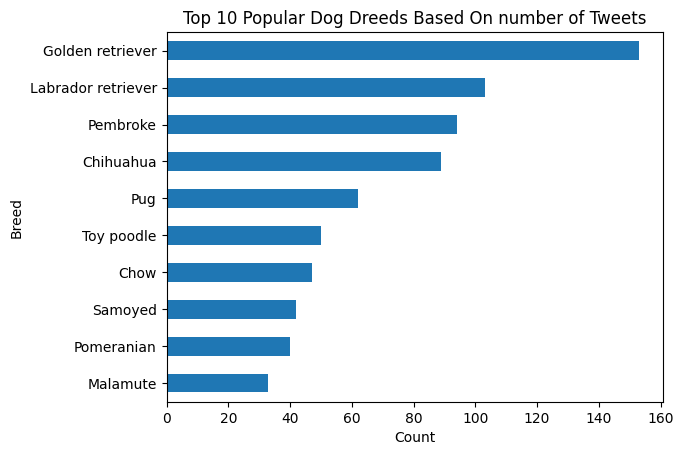

In [285]:
df_target[10::-1].plot(
    kind = "barh", 
    title = "Top 10 Popular Dog Dreeds Based On number of Tweets")
plt.xlabel("Count")
plt.ylabel("Breed");

As we seen form the chart, the most dog breed prediciton is Golden Trtriever, following by Labrador retriever, Pembroke, Chihuahua, Pug, Toy poodle, Chow, Samoyed, Pomeranian, Malamute.

In [286]:
plt.savefig("GraphReport/Top 10 Popular Dog Dreeds Based On number of Tweets.png")

<Figure size 640x480 with 0 Axes>

##### Which top 10 dog breed is  the most popular base on number of retweets

In [287]:
df_target = df[["pre_dog_breed", "retweet_count"]]
df_target = df_target.groupby('pre_dog_breed')['retweet_count'].agg('sum').sort_values(ascending=False).head(10)
df_target

pre_dog_breed
Golden retriever      574953
Labrador retriever    399853
Pembroke              291771
Chihuahua             235679
Samoyed               203446
French bulldog        156230
Cocker spaniel        145743
Chow                  129921
Pug                   118682
Toy poodle            115330
Name: retweet_count, dtype: int64

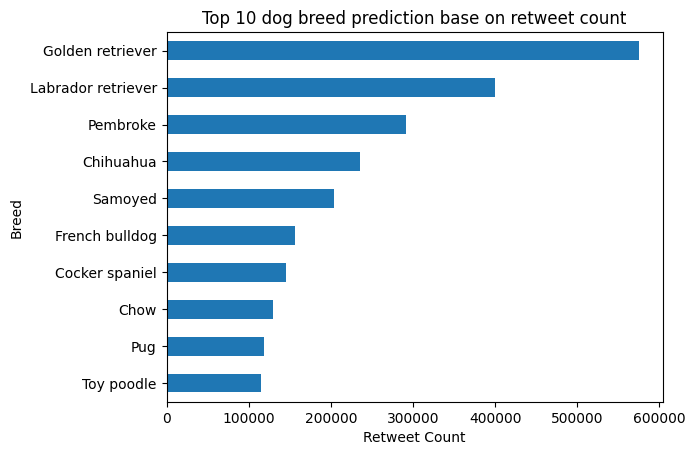

In [288]:
# Plot horizontal bar chart
df_target[10::-1].plot(
    kind = "barh",
    title = "Top 10 dog breed prediction base on retweet count"
)
plt.xlabel("Retweet Count")
plt.ylabel("Breed");

As we seen from the chart, Golden retriever is the most poppular breed in the datasets. It is also the most poppular on the number of tweet too. Following after Golden retriever, we have Labrador retriever, Pembroke, Chihuahua, Samoyed, French bulldog, Cocker spaniel, Chow, Pug, Toy poodle

In [289]:
plt.savefig("GraphReport/Top 10 dog breed prediction base on retweet count.png")

<Figure size 640x480 with 0 Axes>

##### Which top 10 dog breed is  the most popular base on number of total favorite

In [290]:
df_target = df[["pre_dog_breed", "favorite_count"]]
df_target = df_target.groupby('pre_dog_breed')['favorite_count'].agg('sum').sort_values(ascending=False).head(10)
df_target

pre_dog_breed
Golden retriever      1914145
Labrador retriever    1253364
Pembroke              1038797
Chihuahua              717450
Samoyed                583906
French bulldog         570921
Chow                   443610
Cocker spaniel         407412
Pug                    383817
Toy poodle             337270
Name: favorite_count, dtype: int64

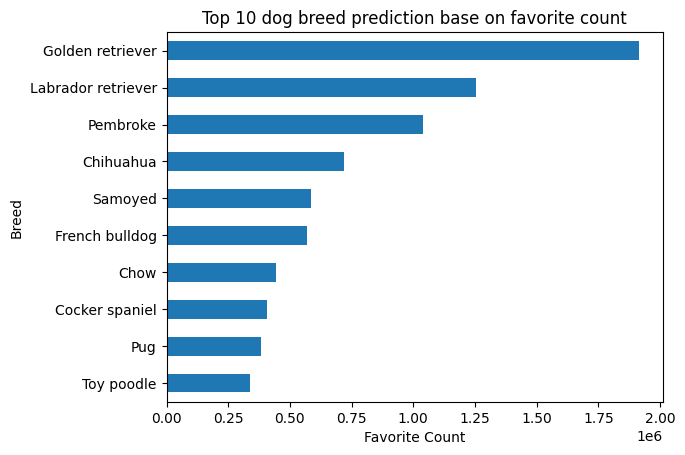

In [291]:
# Plot horizontal bar chart
df_target[10::-1].plot(
    kind = "barh",
    title = "Top 10 dog breed prediction base on favorite count"
)
plt.xlabel('Favorite Count')
plt.ylabel('Breed');

Not suprised much, Golden retiever is also the most poppular breed based on favorite count too. This much be the key to ve puppular on the Social Media. Following after we have Labrador retriever, Pembroke, Chihuahua, Samoyed, French bulldog, Chow, Cocker spaniel, Pug, Toy poodle

In [292]:
plt.savefig("GraphReport/Top 10 dog breed prediction base on favorite count.png")

<Figure size 640x480 with 0 Axes>

##### Histogram of rating_numerator

Since all the denominator all 10, so we will only viualize the numerator to see how it distribution base on its value count

In [293]:
df_target = df[["tweet_id", "rating_numerator"]]
df_target["rating_numerator"].value_counts()

12    421
10    358
11    352
13    221
9     131
8      68
7      31
14     21
6      16
5      14
4       6
3       5
2       2
Name: rating_numerator, dtype: int64

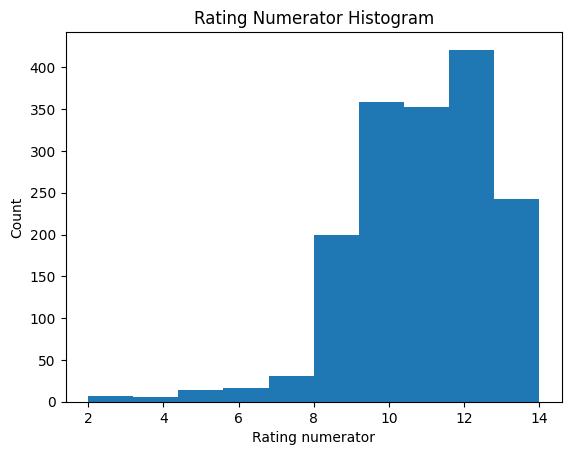

In [294]:
plt.hist(df["rating_numerator"])
plt.title("Rating Numerator Histogram")
plt.xlabel("Rating numerator")
plt.ylabel("Count");

as we can see from the chart, the highest count of rating of all is 12/10. Top 2 is 10, following after by 11, 13 , 9 ....

In [295]:
plt.savefig("GraphReport/Rating Numerator Histogram.png")

<Figure size 640x480 with 0 Axes>